In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

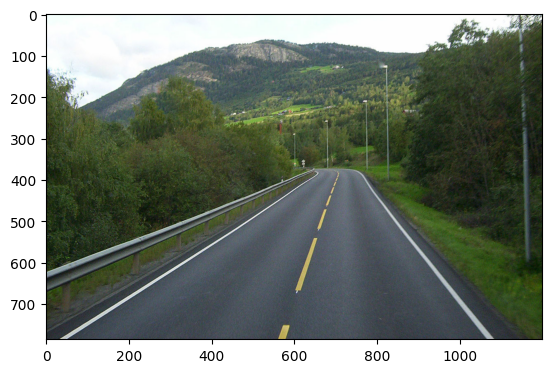

In [50]:
img = cv2.imread('road.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

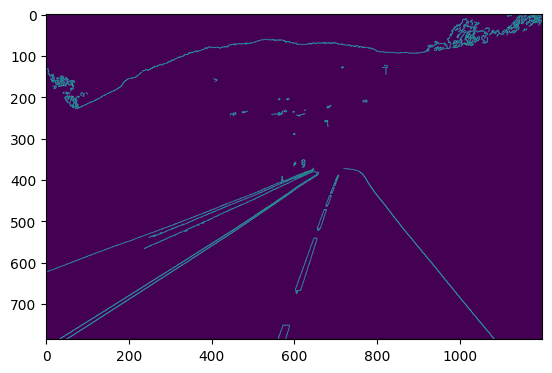

In [62]:
processed = cv2.Canny(img,300, 600, None, 3)
plt.imshow(processed)

In [72]:
# apply the houg line 
lines = cv2.HoughLines(processed,1,np.pi/180,200)
lines = lines.reshape(-1,2)


In [75]:
int(1/(np.pi/180))

57

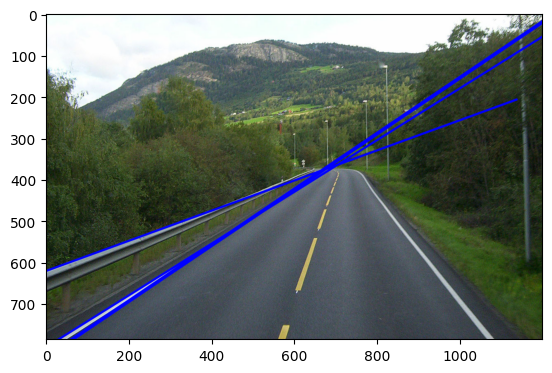

In [71]:
img_draw = img.copy()
for rho,theta in lines:
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a*rho
    y0 = b*rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(img_draw, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(img_draw)

Implementiamo il metodo noi!!

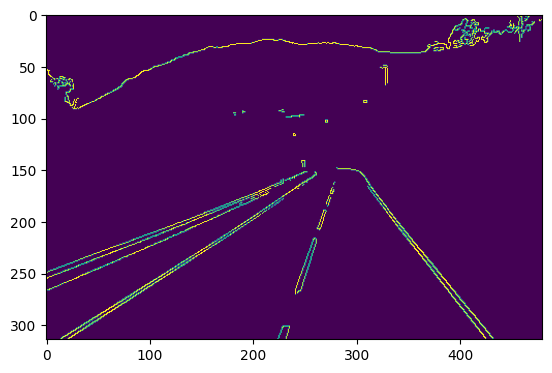

In [107]:
# make processed smaller
img_small  = cv2.resize(img, (0,0), fx=0.4, fy=0.4)
processed_small = cv2.Canny(img_small,300, 600, None, 3)
plt.imshow(processed_small)

In [155]:
def hough_lines(image): 
    Ny = image.shape[0]
    Nx = image.shape[1]
    max_dist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))
    thetas = np.deg2rad(np.arange(-90, 90))
    rs = np.linspace(-max_dist, max_dist, 2*max_dist)
    accumulator = np.zeros((2 * max_dist, len(thetas)))
    for y in range(Ny):
        for x in range(Nx):
            if image[y,x] > 0:
                for k in range(len(thetas)):
                    r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])
                    accumulator[int(r) + max_dist,k] += 1
    
    return accumulator, thetas, rs, max_dist

def find_best(accumulator,thetas,max_dist,n=1):
    ret = []
    vals = np.unravel_index(accumulator.ravel().argsort()[-10:][::-1], accumulator.shape)
    for i in range(n):
        ret.append((vals[0][i]-max_dist,thetas[vals[1][i]]))
    return ret


accumulator, thetas, rs, max_dist = hough_lines(processed_small)


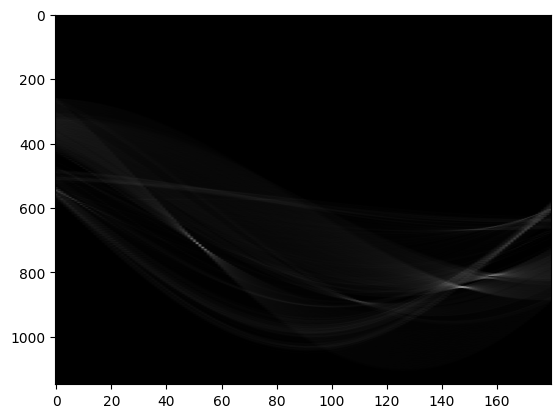

In [156]:
plt.imshow(accumulator, cmap='gray',aspect='auto')

In [157]:
find_best(accumulator,thetas,max_dist,n=10)



[(274, 0.9948376736367679),
 (272, 1.0122909661567112),
 (138, -0.6806784082777885),
 (273, 0.9773843811168246),
 (142, -0.6632251157578453),
 (272, 0.9948376736367679),
 (237, 1.1868238913561442),
 (130, -0.6981317007977318),
 (237, 1.2042771838760873),
 (271, 0.9948376736367679)]

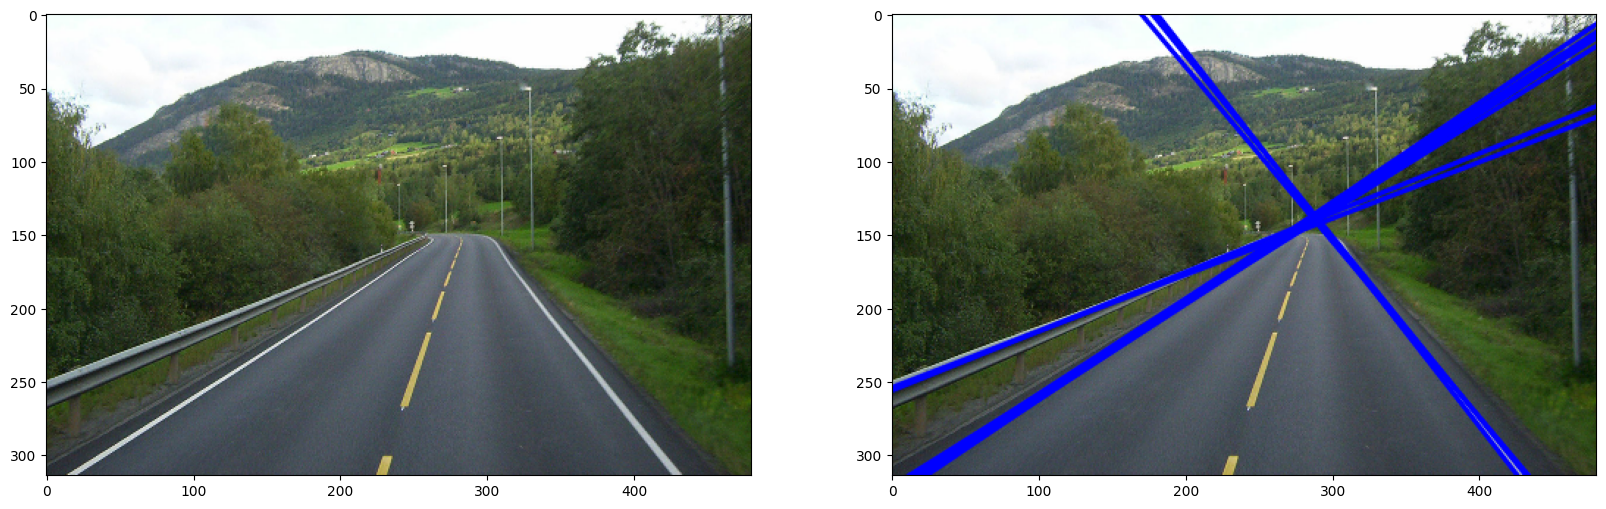

In [167]:
img_draw = img_small.copy()
for rho,theta in find_best(accumulator,thetas,max_dist,n=10):
        
        a = np.cos(theta)
        b = np.sin(theta)
        
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img_draw, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)

# plot image_small and img_draw in a 1x2 grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img_small)
ax2.imshow(img_draw)


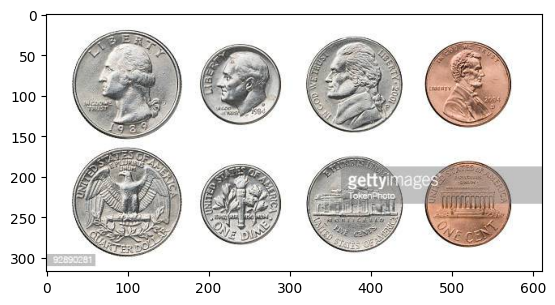

In [201]:
img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
detail = img[10:160,30:170,:]

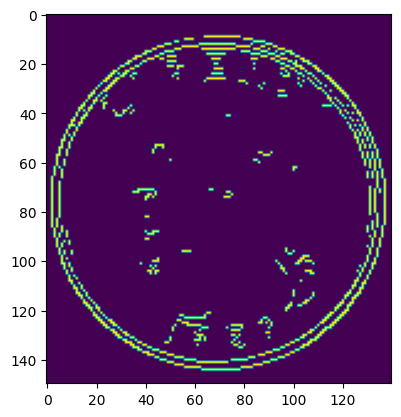

In [203]:
edges = cv2.Canny(detail,600, 500, None, 3)
plt.imshow(edges)

In [204]:
accumulator, thetas, rs, max_dist = hough_lines(edges)

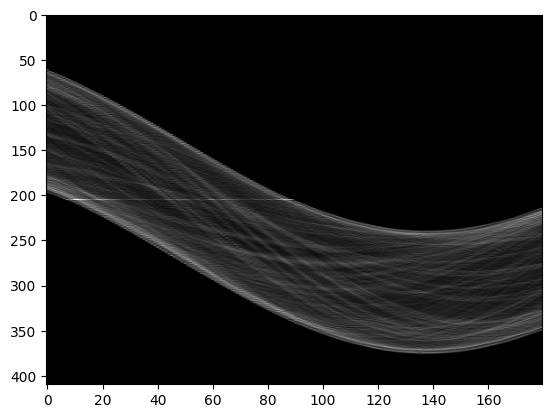

In [205]:
plt.imshow(accumulator, cmap='gray',aspect='auto')